In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [32]:
pd.set_option('display.max_columns', None)

# Feladat:
Telekommunikációs cég ügyfeleinek lemorzsolódását tartalmazza az adathalmaz. 
A feladat, hogy alakítsunk ki az ügyfelekből a tulajdonságaik alapján szegmenseket a KMeans algoritmus segítségével.

A csoportosításhoz ne használd fel az alábbi változókat:
- churn?: ügyfél lemorzsolódott-e
- Contract_date: szerződéskötés ideje
- Cust_ID: ügyfélazonosító

In [33]:
df = pd.read_csv('telco_sampled.csv', sep = ';')

In [34]:
df.head()

Contract_date Package  Gender   Age Marital_Status Living_Condition   
0   9/20/04 12:00 AM  PACK_B    Male  42.0        Married            Owner  \
1   2/12/05 12:00 AM  PACK_B  Female  53.0        Married            Owner   
2  10/19/04 12:00 AM  PACK_X    Male  43.0        Married            Owner   
3  10/31/04 12:00 AM  PACK_B    Male  32.0        Married            Owner   
4  11/19/04 12:00 AM  PACK_B  Female  31.0        Married            Owner   

   Graduation         Job_Type     Income  Peak_minute_09  Weekend_minute_09   
0  University           Leader     15_30k            0.55               0.28  \
1  University  Public_Employee  Below_15k           11.32               6.53   
2  Highschool        Executive     30_60k           78.05               3.90   
3  Highschool         Labourer     15_30k            0.08               0.00   
4  Highschool  Public_Employee     30_60k           20.68              13.87   

   Offpeak_minute_09  Offpeak_nr_09  Peak_nr_09  Weekend_nr_09   
0               0.00            0.0         2.0            1.0  \
1               6.98           26.0        37.0           19.0   
2               8.43            5.0       103.0            9.0   
3               0.00            0.0         1.0            0.0   
4              33.27           49.0        30.0           26.0   

   Selfnet_minute_09  Fixed_minute_09  Othermob_minute_09  Voicemail_nr_09   
0               0.83             0.00                0.00              3.0  \
1               6.70             8.02               10.12             21.0   
2              19.67             2.83               67.88            116.0   
3               0.08             0.00                0.00              1.0   
4              37.90             0.53               23.02             79.0   

   Voicemail_minute_09  SMS_09  Peak_minute_10  Weekend_minute_10   
0                 0.83     0.0            0.00               0.00  \
1                21.90    58.0           25.70               5.28   
2                90.38     1.0           24.30              15.53   
3                 0.08     0.0            0.00               0.00   
4                67.82    26.0           42.08              24.48   

   Offpeak_minute_10  Offpeak_nr_10  Peak_nr_10  Weekend_nr_10   
0               0.00            0.0         0.0            0.0  \
1              15.38           52.0        77.0           32.0   
2               2.63            9.0        40.0           16.0   
3               0.00            0.0         0.0            0.0   
4              31.10           39.0        56.0           28.0   

   Selfnet_minute_10  Fixed_minute_10  Othermob_minute_10  Voicemail_nr_10   
0               0.00             0.00                0.00              0.0  \
1              11.07            12.80               22.50             30.0   
2              17.15             1.68               23.35             65.0   
3               0.00             0.00                0.00              0.0   
4              65.58             1.53               26.10            100.0   

   Voicemail_minute_10  SMS_10  Peak_minute_11  Weekend_minute_11   
0                 0.00     0.0            0.00               0.00  \
1                37.33   128.0           25.33               0.00   
2                42.47     0.0           55.27               1.27   
3                 0.00     0.0            0.00               0.00   
4                97.67    23.0           31.52              28.27   

   Offpeak_minute_11  Offpeak_nr_11  Peak_nr_11  Weekend_nr_11   
0               0.00            0.0         0.0            0.0  \
1               7.60           51.0        49.0           20.0   
2               1.75            7.0        64.0            4.0   
3               0.00            0.0         0.0            0.0   
4              28.37           33.0        48.0           46.0   

   Selfnet_minute_11  Fixed_minute_11  Othermob_minute_11  Voicemail_nr_11   
0               0.00

# 1. Részfeladat: (ADATELŐKÉSZÍTÉS)
A fenti három változó kivételével használd fel az összes változót a klaszterek kialakításakor. Végezz adatelőkészítést, hogy a változók megfelelő formában kerüljenek a modell bemenetére.

(tipp: kategorikus változók, hiányzó értékek, skálázás stb.)

In [35]:
unwanted = ["churn?", "Contract_date", "Cust_ID"]
columns = [column for column in df.columns.values.tolist() if column not in unwanted]
columns

['Package',
 'Gender',
 'Age',
 'Marital_Status',
 'Living_Condition',
 'Graduation',
 'Job_Type',
 'Income',
 'Peak_minute_09',
 'Weekend_minute_09',
 'Offpeak_minute_09',
 'Offpeak_nr_09',
 'Peak_nr_09',
 'Weekend_nr_09',
 'Selfnet_minute_09',
 'Fixed_minute_09',
 'Othermob_minute_09',
 'Voicemail_nr_09',
 'Voicemail_minute_09',
 'SMS_09',
 'Peak_minute_10',
 'Weekend_minute_10',
 'Offpeak_minute_10',
 'Offpeak_nr_10',
 'Peak_nr_10',
 'Weekend_nr_10',
 'Selfnet_minute_10',
 'Fixed_minute_10',
 'Othermob_minute_10',
 'Voicemail_nr_10',
 'Voicemail_minute_10',
 'SMS_10',
 'Peak_minute_11',
 'Weekend_minute_11',
 'Offpeak_minute_11',
 'Offpeak_nr_11',
 'Peak_nr_11',
 'Weekend_nr_11',
 'Selfnet_minute_11',
 'Fixed_minute_11',
 'Othermob_minute_11',
 'Voicemail_nr_11',
 'Voicemail_minute_11',
 'SMS_11',
 'Peak_minute_12',
 'Weekend_minute_12',
 'Offpeak_minute_12',
 'Offpeak_nr_12',
 'Peak_nr_12',
 'Weekend_nr_12',
 'Selfnet_minute_12',
 'Fixed_minute_12',
 'Othermob_minute_12',
 'Voicema

In [36]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols = [
    column for column in categorical_cols if column not in unwanted
]
categorical_cols

['Package',
 'Gender',
 'Marital_Status',
 'Living_Condition',
 'Graduation',
 'Job_Type',
 'Income']

In [37]:
dummies = pd.get_dummies(df[categorical_cols], drop_first=True)

In [38]:
train_df = df.drop(columns=unwanted)
train_df = pd.concat([train_df, dummies], axis=1)
train_df = train_df.drop(columns=categorical_cols)
train_df = train_df.fillna(0)
train_df.head()

Age  Peak_minute_09  Weekend_minute_09  Offpeak_minute_09  Offpeak_nr_09   
0  42.0            0.55               0.28               0.00            0.0  \
1  53.0           11.32               6.53               6.98           26.0   
2  43.0           78.05               3.90               8.43            5.0   
3  32.0            0.08               0.00               0.00            0.0   
4  31.0           20.68              13.87              33.27           49.0   

   Peak_nr_09  Weekend_nr_09  Selfnet_minute_09  Fixed_minute_09   
0         2.0            1.0               0.83             0.00  \
1        37.0           19.0               6.70             8.02   
2       103.0            9.0              19.67             2.83   
3         1.0            0.0               0.08             0.00   
4        30.0           26.0              37.90             0.53   

   Othermob_minute_09  Voicemail_nr_09  Voicemail_minute_09  SMS_09   
0                0.00              3.0                 0.83     0.0  \
1               10.12             21.0                21.90    58.0   
2               67.88            116.0                90.38     1.0   
3                0.00              1.0                 0.08     0.0   
4               23.02             79.0                67.82    26.0   

   Peak_minute_10  Weekend_minute_10  Offpeak_minute_10  Offpeak_nr_10   
0            0.00               0.00               0.00            0.0  \
1           25.70               5.28              15.38           52.0   
2           24.30              15.53               2.63            9.0   
3            0.00               0.00               0.00            0.0   
4           42.08              24.48              31.10           39.0   

   Peak_nr_10  Weekend_nr_10  Selfnet_minute_10  Fixed_minute_10   
0         0.0            0.0               0.00             0.00  \
1        77.0           32.0              11.07            12.80   
2        40.0           16.0              17.15             1.68   
3         0.0            0.0               0.00             0.00   
4        56.0           28.0              65.58             1.53   

   Othermob_minute_10  Voicemail_nr_10  Voicemail_minute_10  SMS_10   
0                0.00              0.0                 0.00     0.0  \
1               22.50             30.0                37.33   128.0   
2               23.35             65.0                42.47     0.0   
3                0.00              0.0                 0.00     0.0   
4               26.10            100.0                97.67    23.0   

   Peak_minute_11  Weekend_minute_11  Offpeak_minute_11  Offpeak_nr_11   
0            0.00               0.00               0.00            0.0  \
1           25.33               0.00               7.60           51.0   
2           55.27               1.27               1.75            7.0   
3            0.00               0.00               0.00            0.0   
4           31.52              28.27              28.37           33.0   

   Peak_nr_11  Weekend_nr_11  Selfnet_minute_11  Fixed_minute_11   
0         0.0            0.0               0.00             0.00  \
1        49.0           20.0               1.83            14.52   
2        64.0            4.0               6.63            15.45   
3         0.0            0.0               0.00             0.00   
4        48.0           46.0              50.80             0.62   

   Othermob_minute_11  Voicemail_nr_11  Voicemail_minute_11  SMS_11   
0                0.00              0.0                 0.00     0.0  \
1               16.58             36.0                32.93    83.0   
2               36.20             74.0                58.28     1.0   
3                0.00              0.0                 0.00     0.0   
4               31.17            103.0                86.70    21.0   

   Peak_minute_12  Weekend_minute_12  Offpeak_minute_12  Offpeak_nr_12   
0            0.00               0.00               

In [39]:
columns = train_df.columns.values.tolist()

In [40]:
train_df = StandardScaler().fit_transform(train_df)

# 2. Részfeladat: (KLASZTEREZÉS)

Az előző feladatrészben előkészített változóiddal keresd meg az optimális k értéket a KMeans algoritmus számára. Ezután végezd el az ügyfelek csoportosítását.

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

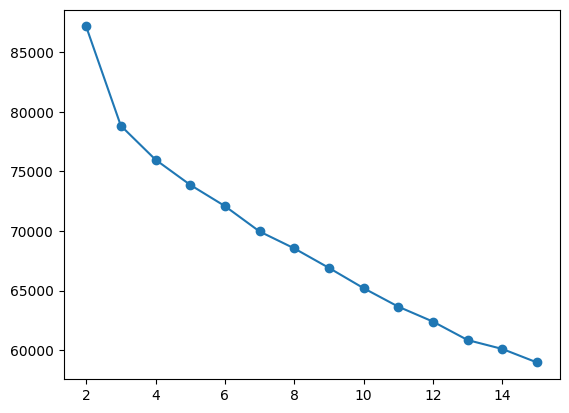

In [41]:
n_clusters_max = 16
inertia_list = []
for n_clusters in range(2, n_clusters_max):
    model = KMeans(n_clusters=n_clusters, random_state=0)
    model.fit(train_df)
    inertia_list.append(model.inertia_)
plt.plot(range(2, n_clusters_max), inertia_list, marker="o")

## Döntési fás móka

In [42]:
model = KMeans(n_clusters=10, random_state=0)
model.fit(train_df)
df["cluster"] = model.predict(train_df)

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
dct = DecisionTreeClassifier(max_depth=2)
dct.fit(train_df, df["cluster"])

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'Marital_Status_Single <= 0.614\ngini = 0.809\nsamples = 1565\nvalue = [93, 457, 22, 30, 332, 237, 13, 93, 15, 273]'),
 Text(0.25, 0.5, 'Job_Type_Labourer <= 0.262\ngini = 0.742\nsamples = 1192\nvalue = [59, 457, 16, 22, 332, 188, 10, 91, 8, 9]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.606\nsamples = 770\nvalue = [35, 456, 15, 16, 25, 130, 6, 78, 3, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.447\nsamples = 422\nvalue = [24, 1, 1, 6, 307, 58, 4, 13, 5, 3]'),
 Text(0.75, 0.5, 'Voicemail_minute_10 <= 0.103\ngini = 0.472\nsamples = 373\nvalue = [34, 0, 6, 8, 0, 49, 3, 2, 7, 264]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.132\nsamples = 271\nvalue = [1, 0, 0, 0, 0, 16, 0, 2, 0, 252]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.762\nsamples = 102\nvalue = [33, 0, 6, 8, 0, 33, 3, 0, 7, 12]')]

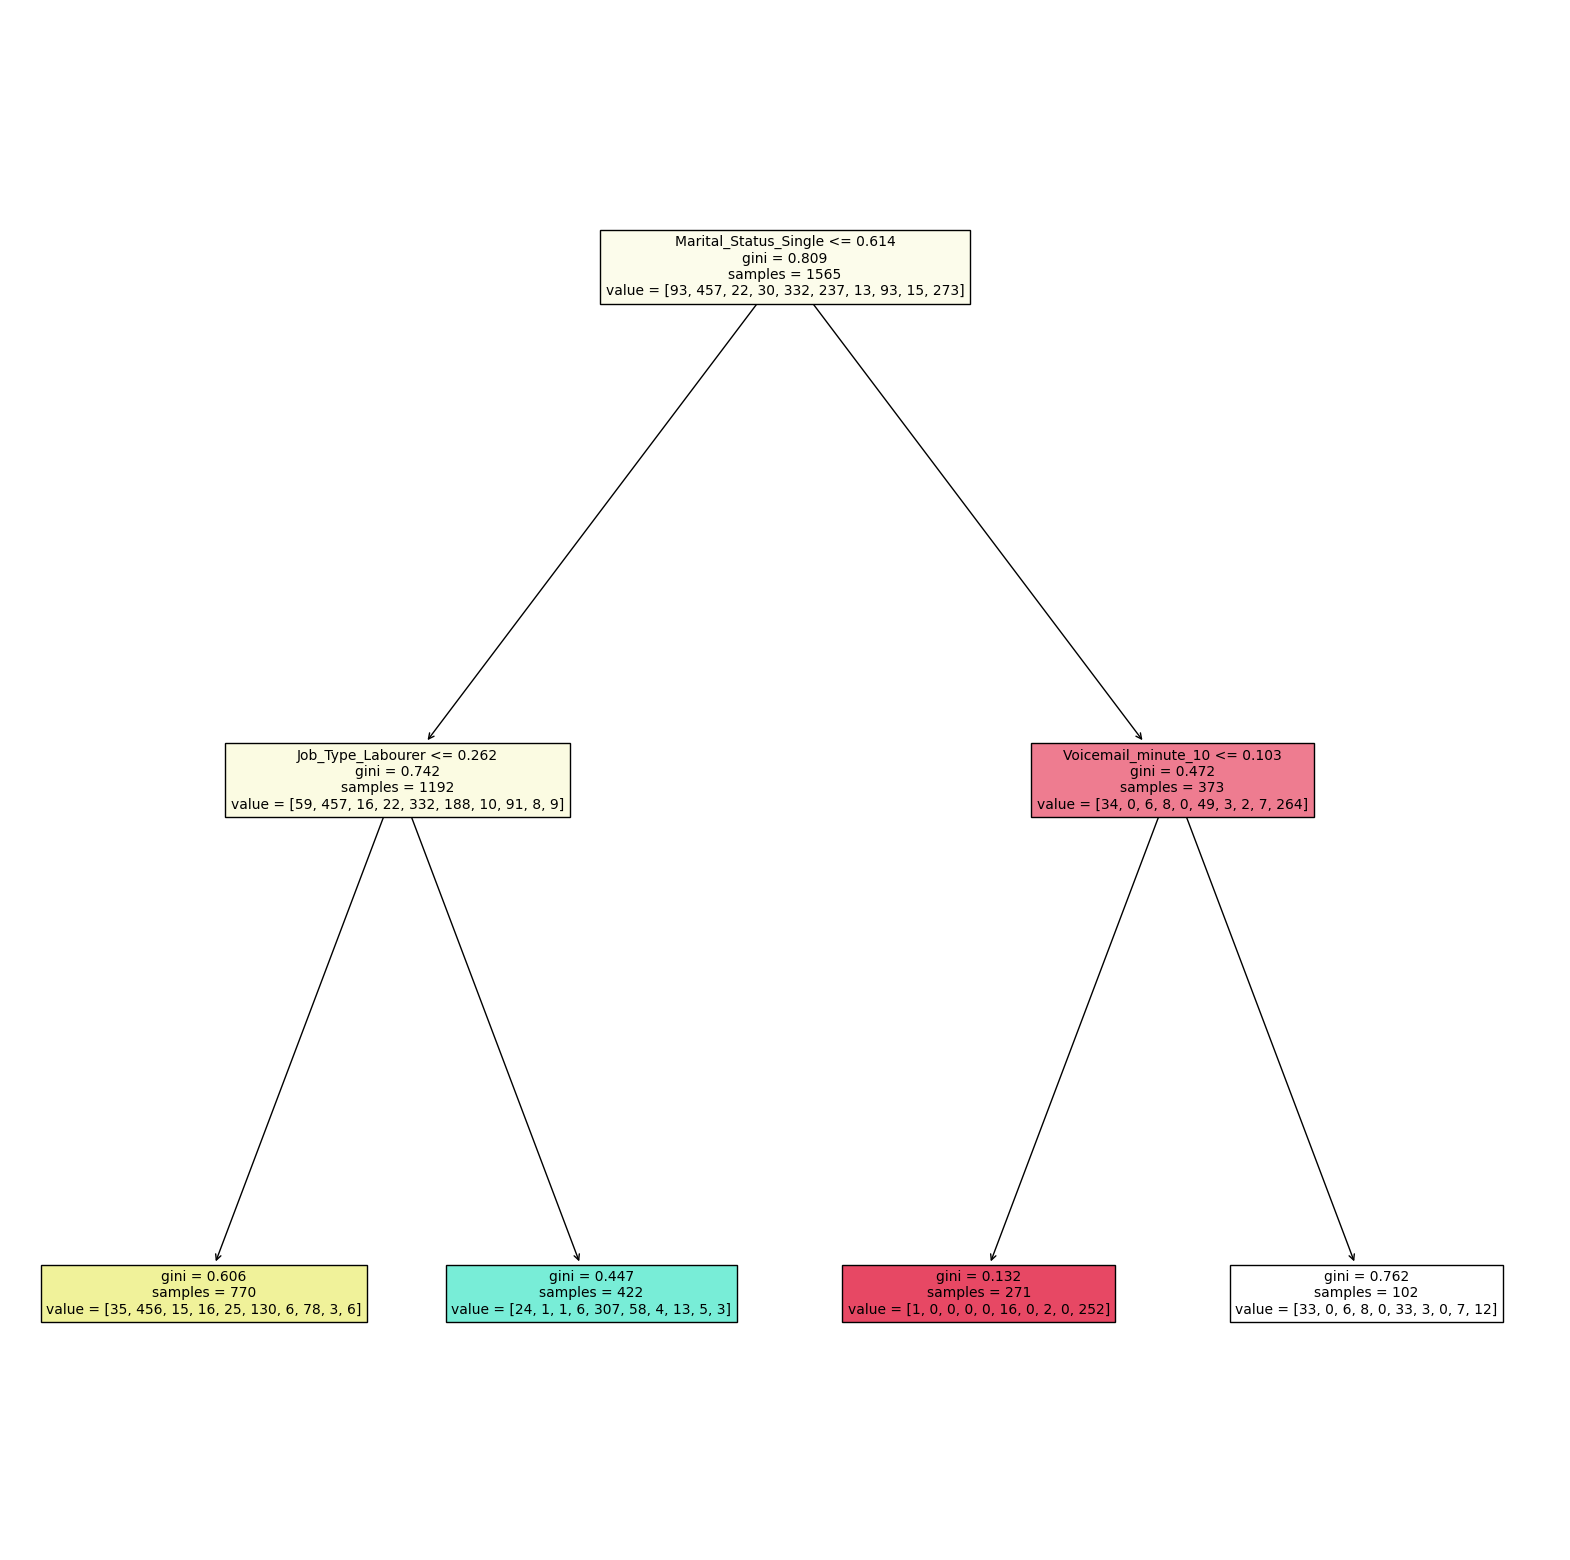

In [46]:
plt.figure(figsize=(20, 20))
plot_tree(dct, feature_names=columns, filled=True, fontsize=10)

# 3. Részfeladat: (KLASZTEREK MAGYARÁZATA)

Próbálj magyarázatot találni, hogy mi jellemzi az egyes csoportokat és milyen jellemzők miatt került egy-egy ügyfél az adott klaszterbe.